# Lab 3 - Clustering

### By: Satvik Ajmera, Dylan Scott, Nnenna Okpara and Jobin Joseph

### Hotel Booking Demand Dataset
- Data Source: https://www.kaggle.com/jessemostipak/hotel-booking-demand
- Data Description Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

Category |Available |Requirements
-----|-----|----- 
Total Points | 100 | 
Business Understanding 1 |10|Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
Data Understanding 1 | 10 |Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
Data Understanding 2|10|Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
Modeling and Evaluation 1|10|Train and adjust parameters
Modeling and Evaluation 2|10|Evaluate and Compare
Modeling and Evaluation 3|10|Visualize Results
Modeling and Evaluation 4|20|Summarize the Ramifications
Deployment|10|Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
Exceptional Work|10|You have free reign to provide additional analyses or combine analyses.

# Business Understanding 1

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

##### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). 

The reason why we choose this data set is that it can be helpful in making insights in the nature of hotel bookings, and realize what  other factors that can influence whether rooms are booked, canceled or left empty. This data set comes from an article “Hotel booking demand datasets” Nuno Antonio, Anade Almeida and Luis Nunes that has been cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday. Models that are created can assist consumers to know what factor to look for when booking a hotel. Other models that are created can be also be used by employers and employees that work in the hospitality business. 

#####  How will you measure the effectiveness of a good algorithm?

Using different combinations of clustering with a logistic regression of the dataset we will create models. We will measure the effectiveness of a good algorithm by seeing whether there if the accuracy of the prediction goes up. We will also look at the standard deviations to see if the model is consistent on its level of accuracy. 

#####  Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

Using  accuracy makes sense for this specific data  set because it can show how good the model will be at predicting if the hotel booking will be cancelled. The  main stake holders, which are the hotel corporations, will be better able to predict if any rooms will be available for a weekend. Once knowing this the hotel corporations,  be able to overbook or adjust room rates accordingly in order to have minimize loss to revenue. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Understanding 1

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [2]:
hotel = pd.read_csv("data/hotel_bookings.csv",low_memory=False)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.**

### Data Description
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

Variable |Type |Description | Further Description
-----|-----|-----|----|
ADR | Numeric | Average Daily Rate |  
Adults | Integer | Number of adults
Agent | Categorical | ID of the travel agency that made the booking
ArrivalDateDayOfMonth | Categorical | Day of the month of the arrival date
ArrivalDateMonth | Numeric | Month of arrival date with 12 categories: “January” to “December”
ArrivalDateWeekNumber | Numeric | Week number of the arrival date
ArrivalDateYear | Numeric | Year of arrival date
AssignedRoomType | Numeric | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
Babies | Integer | Number of babies
BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
Children | Integer | Number of children
Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. 
Country | Categorical | Country of origin.
CustomerType | Categorical | Type of booking. | Assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is asso- ciated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer
DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. | This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
DistributionChannel | Integer | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0)
IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0)
LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
MarketSegment | Categorical | Market segment designation. | In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
Meal | Categorical | Type of meal booked. Categories are presented in standard hospitality meal packages: | Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
PreviousBookingsNotCanceled | Integer | Number of previous bookings that were NOT cancelled by the customer prior to the current booking
PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking
RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer
ReservationStatus | Categorical | Reservation last status | assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
ReservationStatusDate | Date | Date at which the last status was set |
ReservedRoomType | Categorical | Code of room type reserved. |
StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor)|





In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Verify data quality: 
**Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?**

In [4]:
missing_vals = hotel.isna().sum().reset_index()
missing_vals.columns = ["Variable Name","Number of Missing Values"]
missing_vals.sort_values(by="Number of Missing Values", ascending=False)

,Variable Name,Number of Missing Values
24,company,112593
23,agent,16340
13,country,488
10,children,4
19,reserved_room_type,0
20,assigned_room_type,0
21,booking_changes,0
22,deposit_type,0
0,hotel,0
17,previous_cancellations,0


- Looking at the missing values, we can see that the categorical variable `company` has 112,593 missing values of the 119,390 instances. So we decided to remove it entirely. 

Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

- It is important to note that from the data source the NA values are consider as "Not Applicable". For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent. 

- The categorical variable `agent` has over 16340 missing values and `country` has 488 missing values. We removed the `country` variable entirely, because we don't think that it will be a useful predictor in our model. So we decided to drop the subset of NA values for `agent` and `children`. We still wanted to remove the subset of these columns before we do not know where how the customer booked the hotel nor where their country of origin is.

In [5]:
#dropping `company` and `country columns
hotel = hotel.drop(columns = ["company","country"])

In [6]:
hotel=hotel.dropna(subset=['agent',"children"])

In [7]:
no_missing_vals = hotel.isna().sum().reset_index()
no_missing_vals.columns = ["Variable Name","Number of Missing Values"]
no_missing_vals

,Variable Name,Number of Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


Looking at the duplicates, we are not worried about duplicates because of the nature of the dataset. Each instance shows us when a booking resulted in a cancellation or not. The data source did not mention anything about duplicate in the dataset. 

### Looking at outliers:

In [8]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000
mean,0.390032,111.674336,2016.156510,27.339327,15.784198,0.977874,2.589337,1.899464,0.111142,0.007686,0.014023,0.077216,0.024862,0.201702,86.694841,2.615665,104.619980,0.053218,0.605368
std,0.487759,107.671506,0.706216,13.285300,8.794013,1.003935,1.905763,0.491057,0.411817,0.097017,0.117584,0.757689,0.436639,0.624797,110.775127,18.783661,50.034041,0.225719,0.799222
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.800000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


We decided to remove the outliers for the the variables below. ADR (Average Daily Rate) had an incorrect negative value that needed to be removed. Additionally, there were a significant number of outliers for other predictors. So we decided to remove them entirely. 

In [9]:
hotel = hotel[hotel.adr != 5400]
hotel = hotel[hotel.adr != -6.38]
hotel = hotel[hotel.previous_bookings_not_canceled != 50]
hotel = hotel[hotel.days_in_waiting_list != 391]
hotel = hotel[hotel.previous_cancellations != 26]
hotel = hotel[hotel.adults != 26]
hotel = hotel[hotel.children != 10]
hotel = hotel[hotel.babies != 10]

Here are the summary statistics after removing the outliers

In [10]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000
mean,0.389581,111.473997,2016.156934,27.329018,15.786271,0.977944,2.590014,1.898230,0.111133,0.007595,0.014014,0.070663,0.024377,0.201744,86.702099,2.446842,104.606121,0.053260,0.605825
std,0.487658,107.429228,0.706187,13.284131,8.792920,1.003862,1.905747,0.461633,0.410813,0.091924,0.117550,0.636065,0.408056,0.624900,110.785023,16.945466,47.232655,0.225803,0.799359
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.990000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,168.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,9.000000,1.000000,25.000000,25.000000,18.000000,535.000000,379.000000,510.000000,3.000000,5.000000


In [11]:
hotel["is_canceled"].value_counts().reset_index().sort_values(by="is_canceled",ascending=False)

,index,is_canceled
0,0,62853
1,1,40114


# Data Understanding 2

**Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.**

#### What type of hotel has more bookings?

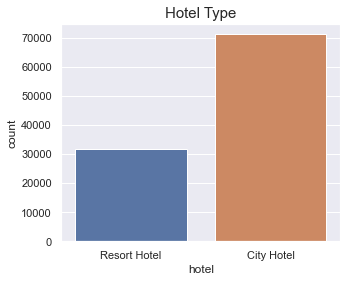

In [12]:
# Count for both hotel types
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=hotel, x = 'hotel')
plt.show()

From the graph above, majority of the bookings were made in city hotels. This could be because city hotels tend to be cheaper, everything is more accessible for individuals or small groups of visitors. Resort prices could reduce the price to increase bookings.

#### Which are the most busy months?

Text(0, 0.5, 'Count')

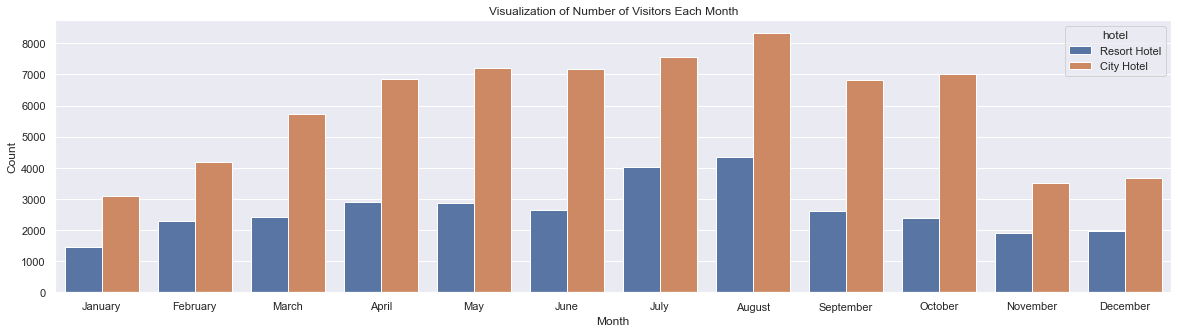

In [13]:
#Which are the most busy months?
plt.figure(figsize=(20,5))

# data we will use in a list
l2 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hotel[l2],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Visualization of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

From the graph above, we can see that August is the busiest month for both City hotels and Resort hotels whereas bookings are lowest during January for both types of hotels. This could be because of weather conditions as people prefer going for vacation during more comfortable seasons such as Spring or Summer and not during Winter.

#### Visualizing the response variable: `is_cancelled`

C:\Users\Jobin J\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bookings Cancelled')

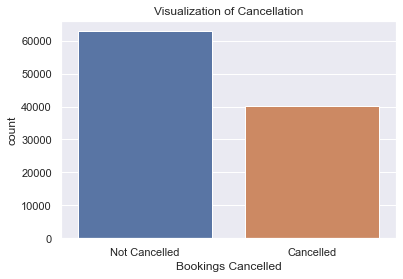

In [14]:
#Replace the 1s and 0s in the is_cancelled column to cancelled and not cancelled
hotel['is_canceled'] = hotel.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
cancelled_data = hotel['is_canceled']

# Plotting
sns.countplot(cancelled_data).set_title("Visualization of Cancellation")
plt.xlabel("Bookings Cancelled")

From the graph above, We can see that more than 60% of the bookings were not cancelled.

#### Cancellation rates in the two types of hotels

Text(0.5, 1.0, 'Cancellation rates in city and resort hotel')

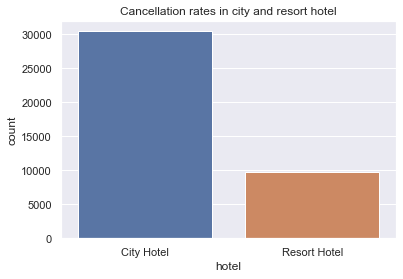

In [15]:
# Let's look into how much of bookings were cancelled in each type of hotel
lst2 = ['is_canceled', 'hotel']
type_of_hotel_canceled = hotel[lst2]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
canceled_hotel
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Cancellation rates in city and resort hotel')

From the cancellation graph showing the hotel types, we can see that city hotels have three times more cancellations than resort hotels and that is because city hotels have more bookings as we have seen earlier.

#### Who travels and in which group?

[Text(0.5, 1.0, 'Number of children'),
 Text(551.7838235294118, 0.5, 'Total number'),
 Text(0.5, 21.5, 'Group size')]

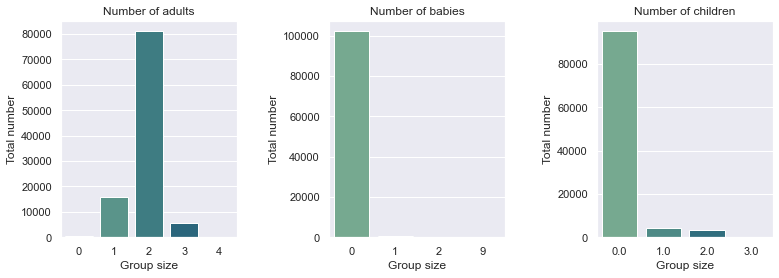

In [16]:
hotel_num = hotel[["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"]]
fig, ax = plt.subplots(1,3,figsize=(12,5))
fig.tight_layout(pad=5.0)
sns.countplot(x=hotel_num.adults, ax=ax[0], palette="crest").set(title="Number of adults", ylabel="Total number", xlabel="Group size")

sns.countplot(x=hotel_num.babies, ax=ax[1], palette="crest").set(title="Number of babies", ylabel="Total number", xlabel="Group size")

sns.countplot(x=hotel_num.children, ax=ax[2], palette="crest").set(title="Number of children", ylabel="Total number", xlabel="Group size")

From the graphs above, we can see that most reservations were made by adults without children or babies. Approximately 74% of adults travel with another adult, most likely the two adults are couples travel together. Travelling with babies or children is rare. From the graph "Number of adults" we can see that there is a column 0, this could be that the bookings were made by teenagers and young adults (below 18 years old), who travel alone or with friends/ spouse.

#### Lead time (the number of days from booking to arrival date), Booking changes

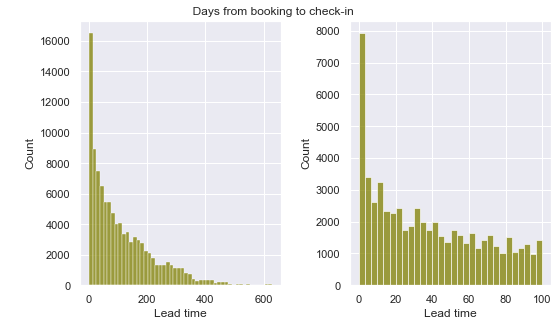

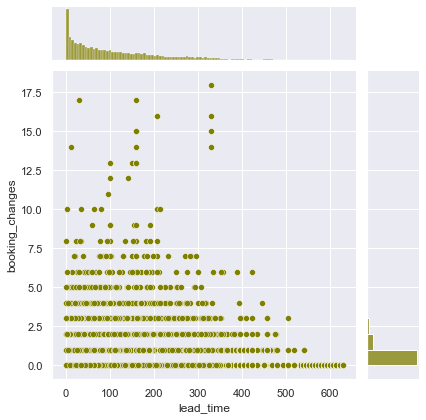

In [17]:
days_to_dep_list = []

for days in hotel_num["lead_time"]:
    if days <= 100:
        days_to_dep_list.append(days)

fig, ax = plt.subplots(1,2, figsize=(8,5))
fig.tight_layout(pad=3)
    
sns.histplot(hotel_num.lead_time, bins=50, color="olive", ax=ax[0]).set(xlabel= "Lead time",title="                                                       Days from booking to check-in")
sns.histplot(days_to_dep_list, bins=30, color="olive", ax=ax[1]).set(xlabel="Lead time")
sns.jointplot(x=hotel.lead_time, y=hotel.booking_changes, color="olive")

From the graph above, we can see that It seems the longer people book in advance the less they are likely to change their original reservation.

#### Visualizing Correlations

<AxesSubplot:>

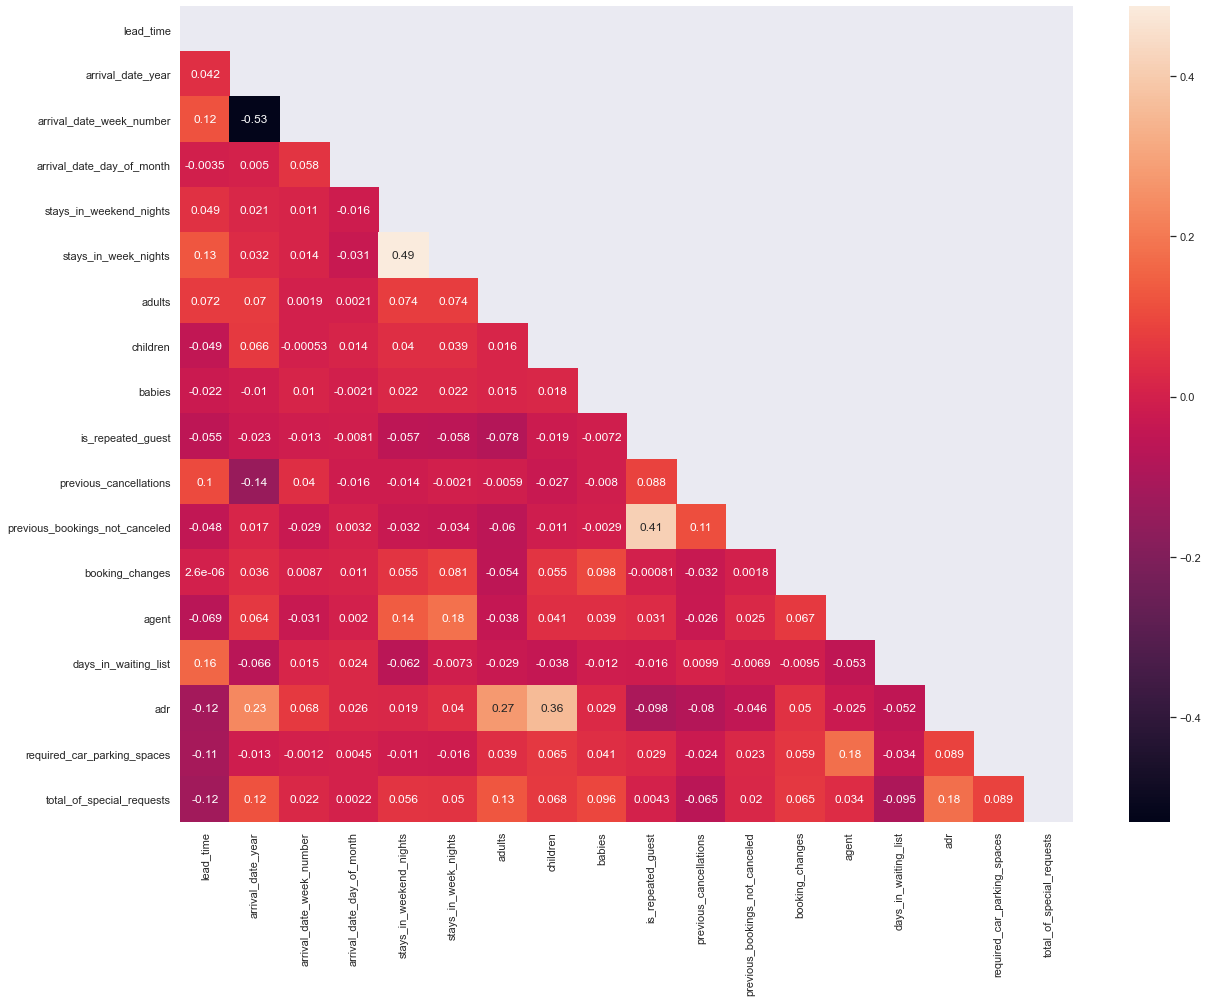

In [18]:
plt.figure(figsize=(20,15))

corr= hotel.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

From the plots, We see lot of correlation among the following variables:

1. stays_in_week_nights & stays_in_weekend_nights are highly positively correlated. 
2. Arrival_date_week_number & arrival_date_year are highly negatively correlated.
3. Previous_booking_not_cancelled & Is_repeated_guest are highly positvely correlated.

We would like to explore clustering the highly correlated variables.

#### Final Preprocessing Of Data

In [19]:
#Converted arrival_date_month to a numerical variable
hotel["arrival_date_month"] = hotel["arrival_date_month"].replace({"January":1,"February":2,
                                                                  "March":3,"April":4,
                                                                  "May":5,"June":6,
                                                                  "July":7,"August":8,
                                                                  "September":9,"October":10,
                                                                  "November":11,"December":12})

**We removed the reservation_status and reservation_status_date because of multicolinearity with the response variable is_cancelled.**

In [20]:
new_hotel = hotel.drop(columns=["reservation_status","reservation_status_date"])

In [21]:
new_hotel['is_canceled']= new_hotel['is_canceled'].replace(["Cancelled","Not Cancelled"],[1,0])

In [22]:
new_hotel.reset_index(inplace=True,drop=True)

**Final dataframe before one-hot encoding and scaling called: `new_hotel`**

In [23]:
new_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102967 entries, 0 to 102966
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102967 non-null  object 
 1   is_canceled                     102967 non-null  int64  
 2   lead_time                       102967 non-null  int64  
 3   arrival_date_year               102967 non-null  int64  
 4   arrival_date_month              102967 non-null  int64  
 5   arrival_date_week_number        102967 non-null  int64  
 6   arrival_date_day_of_month       102967 non-null  int64  
 7   stays_in_weekend_nights         102967 non-null  int64  
 8   stays_in_week_nights            102967 non-null  int64  
 9   adults                          102967 non-null  int64  
 10  children                        102967 non-null  float64
 11  babies                          102967 non-null  int64  
 12  meal            

#### Undersampling, One-Hot-Encoding and Standard Scaling our data

In [24]:
X = new_hotel.drop("is_canceled",axis=1)
y = new_hotel["is_canceled"]

Before one-hot encoding, and standard scaling we wanted to balance our data and undersample. We did this so we can improve the runtime especially for clustering. We see that the runtime for these clustering algorithms is impacted by the size of the data. So reducing the number of instances per class reduces the number of distances that are need to be calculated. We wanted to be above the data requirement, so we chose 20,000 instances for each class with total to 40,000 observations for our train.

In [25]:
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(sampling_strategy={0:20000,1:20000})
X_us, y_us = us.fit_resample(X, y)

In [26]:
X_us

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,137,2017,3,10,6,1,1,2,0.0,...,A,A,0,No Deposit,37.0,0,Transient-Party,80.00,0,1
1,Resort Hotel,176,2016,7,29,15,2,5,2,0.0,...,E,E,0,No Deposit,171.0,0,Transient,151.40,0,0
2,Resort Hotel,100,2017,4,17,29,2,1,2,0.0,...,D,D,0,No Deposit,385.0,0,Transient-Party,93.00,0,1
3,Resort Hotel,160,2016,12,52,24,2,5,3,1.0,...,H,H,0,No Deposit,250.0,0,Transient,92.19,0,0
4,City Hotel,33,2017,1,3,17,0,2,1,0.0,...,A,A,1,No Deposit,19.0,0,Transient-Party,75.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Resort Hotel,37,2016,4,18,29,2,5,2,0.0,...,A,A,0,Non Refund,71.0,0,Transient,46.00,0,0
39996,Resort Hotel,139,2016,6,23,2,2,7,2,2.0,...,G,G,0,No Deposit,240.0,0,Transient,137.89,0,0
39997,City Hotel,40,2015,8,33,15,2,2,2,0.0,...,A,A,0,No Deposit,1.0,0,Transient-Party,62.00,0,0
39998,City Hotel,117,2017,4,17,29,0,1,1,0.0,...,E,E,0,No Deposit,9.0,0,Transient,153.00,0,0


In [27]:
#One hot encode specific columns without standardizing and scaling continuous variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["hotel", 'meal','market_segment','distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type']

ohe = OneHotEncoder(drop="first")

hotel_object = X_us.select_dtypes('object')
ohe.fit(hotel_object)

codes = ohe.transform(hotel_object).toarray()
feature_names = ohe.get_feature_names(categorical_features)

X_us = pd.concat([X_us.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)


In [28]:
X_us

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,137,2017,3,10,6,1,1,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,176,2016,7,29,15,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,100,2017,4,17,29,2,1,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,160,2016,12,52,24,2,5,3,1.0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,2017,1,3,17,0,2,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,37,2016,4,18,29,2,5,2,0.0,0,...,0,0,0,0,0,1,0,0,1,0
39996,139,2016,6,23,2,2,7,2,2.0,0,...,0,1,0,0,0,0,0,0,1,0
39997,40,2015,8,33,15,2,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
39998,117,2017,4,17,29,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y_us

0        0
1        0
2        0
3        0
4        0
        ..
39995    1
39996    1
39997    1
39998    1
39999    1
Name: is_canceled, Length: 40000, dtype: int64

### Standard Scaling All Continuous Variables

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
continuous_variables = ['lead_time',"arrival_date_month",'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                        'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                        'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
                        'total_of_special_requests']
stdsclr = StandardScaler()

X_us[continuous_variables] = stdsclr.fit_transform(X_us[continuous_variables])

In [31]:
X_us.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H',

# Modeling and Evaluation 1


For the purpose of this lab, we have used 3 fold cross validation with a train / test split of 90%/10%. With the help of the helper function, we can get the mean accuracy, precision and recall for each fold.

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.10, random_state=0)

In [33]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

Our base model is a logistic regression model that yielded a mean accuracy of 76.733%. We would like to use clustering to try to improve the overall accuracy and lower the standard deviation of the accuracy.

In [34]:
%%time
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000, random_state=0)

EvaluateClassifierEstimator(clf, X_us, y_us, cv)

The average accuracy for all cv folds is: 			 0.7715
The average precision for all cv folds is: 			 0.79565
The average recall for all cv folds is: 			 0.73067
*********************************************************
Cross Validation Fold Mean Error Scores
Wall time: 1.44 s


,Accuracy,Precision,Recall
0,0.77250,0.797814,0.730
1,0.77275,0.796306,0.733
2,0.76925,0.792822,0.729


#### Clustering Our Data:
We decided to test 3 groups of variables for clustering. We wanted to compare the results between them to see if the accuracy has improved by clustering these specific predictors. So we have:

- X1: `stays_in_week_nights`, and `stays_in_weekend_nights`
- X2: `is_repeated_guest` and `previous_bookings_not_canceled`
- X3: `adr`,`stays_in_week_nights`, `adults`, `children`,`babies`, and `stays_in_weekend_nights`


In [35]:
X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

### K-Means Clustering - X1

In [36]:
%%time
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

params = []
inertias = []

for n in range(3,20):
    cls1_kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
    cls1_kmeans.fit(X1)
    
    newfeature = cls1_kmeans.labels_ # the labels from kmeans clustering
    inertias.append(cls1_kmeans.inertia_)
    original_X = X_us.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)
    X_final = np.column_stack((original_X,pd.get_dummies(newfeature)))
    
    
    acc = cross_val_score(clf,X_final,y=y_us,cv=cv)
    params.append((n,acc.mean()*100,acc.std()*100))
    
    print (" For", n, "Clusters.", "The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

 For 3 Clusters. The average accuracy =  77.075 +- 0.3265986323710907
 For 4 Clusters. The average accuracy =  77.14166666666668 +- 0.3274480450731422
 For 5 Clusters. The average accuracy =  77.12500000000001 +- 0.34880749227427066
 For 6 Clusters. The average accuracy =  77.14166666666667 +- 0.2656229575084897
 For 7 Clusters. The average accuracy =  77.20833333333333 +- 0.34298526045428174
 For 8 Clusters. The average accuracy =  77.12500000000001 +- 0.244948974278318
 For 9 Clusters. The average accuracy =  77.23333333333335 +- 0.2552232138518917
 For 10 Clusters. The average accuracy =  76.99166666666667 +- 0.23481671339342416
 For 11 Clusters. The average accuracy =  77.14166666666667 +- 0.2786375582883451
 For 12 Clusters. The average accuracy =  77.10000000000001 +- 0.27613402542968296
 For 13 Clusters. The average accuracy =  77.075 +- 0.244948974278318
 For 14 Clusters. The average accuracy =  77.16666666666666 +- 0.2294316649656058
 For 15 Clusters. The average accuracy =  7

### K-Means Clustering - X2

In [37]:
%%time
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

params = []
for n in range(3,20):

    X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]

    cls2_knn = KMeans(n_clusters=n, init='k-means++',random_state=0)
    cls2_knn.fit(X2)
    
    newfeature = cls2_knn.labels_ # the labels from kmeans clustering
    
    original_X = X_us.drop(['arrival_date_week_number','arrival_date_year'], axis=1)
    X_final = np.column_stack((original_X,pd.get_dummies(newfeature)))
    
    acc = cross_val_score(clf,X_final,y=y_us,cv=cv)
    params.append((n,acc.mean()*100,acc.std()*100))
    
    print (" For", n, "Clusters.", "The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)


 For 3 Clusters. The average accuracy =  77.19166666666666 +- 0.08249579113842669
 For 4 Clusters. The average accuracy =  77.18333333333334 +- 0.09428090415820642
 For 5 Clusters. The average accuracy =  77.18333333333334 +- 0.09428090415820642
 For 6 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 7 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 8 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 9 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 10 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 11 Clusters. The average accuracy =  77.24166666666666 +- 0.06561673228343487
 For 12 Clusters. The average accuracy =  77.24166666666666 +- 0.06561673228343487
 For 13 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 14 Clusters. The average accuracy =  77.24166666666666 +- 0.06561673228343487
 For 15 Clusters. The average accuracy =  77.25 +- 0.07071067811865743
 For 16 Clus

### K-Means Clustering - X3

In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

params = []
distortions = []
inertias = []

for n in range(3,20):

    X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

    cls3_knn = KMeans(n_clusters=n, init='k-means++',random_state=0)
    cls3_knn.fit(X3)
    newfeature_1 = cls3_knn.labels_ # the labels from kmeans clustering
    distortions.append(sum(np.min(cdist(X3, cls3_knn.cluster_centers_, 'euclidean'), axis=1)) / X3.shape[0])
    inertias.append(cls3_knn.inertia_)
    
    original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled'], axis=1)
    final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

    acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
    params.append((n,acc.mean()*100,acc.std()*100))
    
    print (" For", n, "Clusters.", "The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

 For 3 Clusters. The average accuracy =  77.05000000000001 +- 0.05400617248673136
 For 4 Clusters. The average accuracy =  77.18333333333334 +- 0.07728015412912755
 For 5 Clusters. The average accuracy =  77.15 +- 0.04082482904638634
 For 6 Clusters. The average accuracy =  77.09166666666665 +- 0.11242281302693172
 For 7 Clusters. The average accuracy =  77.19999999999999 +- 0.14719601443880012
 For 8 Clusters. The average accuracy =  77.19166666666666 +- 0.14766704288891067
 For 9 Clusters. The average accuracy =  77.16666666666669 +- 0.18521758975744299
 For 10 Clusters. The average accuracy =  77.10000000000001 +- 0.16329931618554536
 For 11 Clusters. The average accuracy =  77.14999999999999 +- 0.25083194905487505
 For 12 Clusters. The average accuracy =  77.30833333333335 +- 0.14481789330819167
 For 13 Clusters. The average accuracy =  77.3 +- 0.05400617248673136
 For 14 Clusters. The average accuracy =  77.16666666666666 +- 0.2656229575084897
 For 15 Clusters. The average accurac

#### K Means X1
Looping through n_clusters from 3 to 19:
- Our best accuracy (with lowest standard deviation) for **14 Clusters** is 76.81666666666666 +- 0.6678115169883041.

#### K Means X2
Looping through n_clusters from 3 to 19:
- Our best accuracy (with lowest standard deviation) for **3 Clusters** is 76.63333333333333 +- 0.7450764315752392.

#### K Means X3
Looping through n_clusters from 3 to 19:
- Our best accuracy (with lowest standard deviation) for **17 Clusters** is 76.76666666666667 +- 0.6995037923811088.

###  Inertia vs. K Plot for X1:

Looking above, the clustering for **X1** yielded the best accuracy and lowest standard deviation of X1, X2 and X3. So we will look at the 

In [39]:
plt.plot(n_shape, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

NameError: name 'n_shape' is not defined

#### Clustering both X1 and X2:
What effect does X1 and X2 on accuracy when clustering both X1 and X2 seperately. Does this improve our overall accuracy and standard deviation? The range for both X1 and X2 includes K value with the best accuracy from above. So X1 includes 14 and X2 includes 3

In [40]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]

params = []
# we want to include ranges that have our best results from above
for n in range(11,15):
    for n2 in range(2,5):

    
        cls4_knn = KMeans(n_clusters=n, init='k-means++',random_state=0)
        cls4_knn.fit(X1)
        newfeature = cls4_knn.labels_ # the labels from kmeans clustering

        cls5_knn = KMeans(n_clusters=n2, init='k-means++',random_state=0)
        cls5_knn.fit(X2)
        newfeature2 = cls5_knn.labels_ # the labels from kmeans clustering
        
        original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled',
                           'stays_in_week_nights','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature),pd.get_dummies(newfeature2)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((n,n2,acc.mean()*100,acc.std()*100))

        print ("For X1", n, "clusters and X2",n2, "clusters", "The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        


For X1 11 clusters and X2 2 clusters The average accuracy =  77.25833333333334 +- 0.14766704288891358
For X1 11 clusters and X2 3 clusters The average accuracy =  77.30833333333335 +- 0.21826334756181293
For X1 11 clusters and X2 4 clusters The average accuracy =  77.3 +- 0.231840462387391
For X1 12 clusters and X2 2 clusters The average accuracy =  77.19999999999999 +- 0.15411035007422547
For X1 12 clusters and X2 3 clusters The average accuracy =  77.20833333333333 +- 0.24944382578492966
For X1 12 clusters and X2 4 clusters The average accuracy =  77.20833333333333 +- 0.265622957508485
For X1 13 clusters and X2 2 clusters The average accuracy =  77.16666666666666 +- 0.14481789330818762
For X1 13 clusters and X2 3 clusters The average accuracy =  77.18333333333334 +- 0.2094967514996085
For X1 13 clusters and X2 4 clusters The average accuracy =  77.14999999999999 +- 0.21505813167606475
For X1 14 clusters and X2 2 clusters The average accuracy =  77.25 +- 0.20716338157760086
For X1 14 

#### For X1 and X2

For X1 in the range of 11 to 14 and X2 from 2 to 4:
- Our best accuracy (with lowest standard deviation) for X1 (**13 Clusters**) and X2 (**2 Clusters**) is 76.83333333333334 +- 0.7101447426796554.
- Overall it did not improve our overall accuracy and standard deviation by grouping this way.



### DBSCAN Clustering - X1

In [41]:
#X1

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,10):

        # append on the clustering
        cls1_dbscn = DBSCAN(eps=eps, min_samples=mpts)
        cls1_dbscn.fit(X1)
        newfeature_1 = cls1_dbscn.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((eps,mpts,acc.mean()*100,acc.std()*100))

        print("For Eps", eps, "For min pts",mpts,"The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

NameError: name 'DBSCAN' is not defined

### DBSCAN Clustering - X2

In [ ]:
#X2
params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,10):

        # append on the clustering
        cls2_dbscn = DBSCAN(eps=eps, min_samples=mpts)
        cls2_dbscn.fit(X2)
        newfeature_1 = cls2_dbscn.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((eps,mpts,acc.mean()*100,acc.std()*100))

        print("For Eps", eps, "For min pts",mpts,"The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

### DBSCAN Clustering - X3

In [ ]:
%%time 
#X3
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]
from sklearn.cluster import DBSCAN

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,10):

        # append on the clustering
        cls3_dbscn = DBSCAN(eps=eps, min_samples=mpts)
        cls3_dbscn.fit(X3)
        newfeature_1 = cls3_dbscn.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((eps,mpts,acc.mean()*100,acc.std()*100))
        print("For Eps", eps, "For min pts",mpts,"The average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        


#### DBSCAN: X1
For all points of epsilon,  MinPts of 5:
- Our best accuracy (with lowest standard deviation) is 76.78333333333333 +- 0.6345383273600531.

#### DBSCAN: X2
For all points of epsilon,  MinPts of 9:
- Our best accuracy (with lowest standard deviation) is 76.69166666666668 +- 0.700099199320276.

#### DBSCAN: X3
For Epsilon=0.15, MinPts of 5:
- Our best accuracy (with lowest standard deviation) is 76.7 +- 0.5682575707077409.

### Agglomerative Clustering - X1

In [ ]:
%%time
from sklearn.cluster import AgglomerativeClustering
params = []
for link in ['ward', 'complete', 'average']:
    for n in range(4,5):

        # append on the clustering
        cls1_agg = AgglomerativeClustering(n_clusters=n, linkage=link)
        cls1_agg.fit(X1)
        newfeature_1 = cls1_agg.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((link,n,acc.mean()*100,acc.std()*100))

        print("For X1:", "C=",n,"Link:",link,"The Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

### Agglomerative Clustering - X2

In [ ]:
%%time
params = []
for link in ['ward', 'complete', 'average']:
    for n in range(4,5):

        # append on the clustering
        cls2_agg = AgglomerativeClustering(n_clusters=n, linkage=link)
        cls2_agg.fit(X2)
        newfeature_1 = cls2_agg.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((link,n,acc.mean()*100,acc.std()*100))

        print("For X2:", "C=",n,"Link:",link,"The Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

### Agglomerative Clustering - X3

In [ ]:
%%time 

X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

params = []
for link in ['ward', 'complete', 'average']:
    for n in range(4,5):

        # append on the clustering
        cls3_agg = AgglomerativeClustering(n_clusters=n, linkage=link)
        cls3_agg.fit(X3)
        newfeature_1 = cls3_agg.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((link,n,acc.mean()*100,acc.std()*100))

        print("For X3:", "C=",n,"Link:",link,"The Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

#### Agglomerative Clustering: X1
For C = 4,  Link = Complete: 
- Our best accuracy (with lowest standard deviation) is 76.72500000000001 +- 0.7558108228915484

#### Agglomerative Clustering: X2
For C = 4,  Link = Ward: 
- Our best accuracy (with lowest standard deviation) is 76.71666666666667 +- 0.7252394240678199

#### Agglomerative Clustering: X3
For C = 4,  Link = Ward: 
- Our best accuracy (with lowest standard deviation) is 76.50833333333334 +- 0.683841274630952

### Gaussian Mixture - X1

In [ ]:
%%time
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
#X1
lowest_bic = np.infty
bic = []
n_components_range = range(4, 20)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X1)
        bic.append(gmm.bic(X1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm
best_gmm1

### Gaussian Mixture - X2

In [ ]:
%%time
#X2
lowest_bic = np.infty
bic = []
n_components_range = range(5,20)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X2)
        bic.append(gmm.bic(X2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm
best_gmm2

### Gaussian Mixture - X3

In [ ]:
%%time
#X3
lowest_bic = np.infty
bic = []
n_components_range = range(7, 17)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X3)
        bic.append(gmm.bic(X3))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm
best_gmm3

#### Gaussian Mixture: X1
For n_components=19:
- Our best accuracy (with lowest standard deviation) is 76.72500000000001 +- 0.7558108228915484

#### Gaussian Mixture: X2
For covariance_type='diag', n_components=16:
- Our best accuracy (with lowest standard deviation) is 76.72500000000001 +- 0.7558108228915484

#### Gaussian Mixture: X3
For covariance_type='diag', n_components=15:
- Our best accuracy (with lowest standard deviation) is 76.72500000000001 +- 0.7558108228915484


# Modeling and Evaluation 2

Evaluate and Compare

#### K-Means Clustering - Comparing X1, X2 and X3 Silhouette Scores

In [ ]:
%%time

from sklearn.metrics import silhouette_score

label_kmeans = cls1_kmeans.fit_predict(X1)

# Evaluating the performance
X1_Sil_Scores_kmeans = silhouette_score(X1, label_kmeans)
print("Silhoutte Scores of K-means Clustering X1:", X1_Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = cls2_knn.fit_predict(X2)

# Evaluating the performance
X2_Sil_Scores_kmeans = silhouette_score(X2, label_kmeans)
print("Silhoutte Scores of K-means Clustering X2:", X2_Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = cls3_knn.fit_predict(X3)

# Evaluating the performance
X3_Sil_Scores_kmeans = silhouette_score(X3, label_kmeans)
print("Silhoutte Scores of K-means Clustering X3:", X3_Sil_Scores_kmeans)

#### DBSCAN Clustering - Comparing X1, X2 and X3 Silhouette Scores

In [ ]:
%%time

label_kmeans = cls1_dbscn.fit_predict(X1)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X1, label_kmeans)
print("Silhoutte Scores of DBSCN Clustering X1:", Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = cls2_dbscn.fit_predict(X2)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X2, label_kmeans)
print("Silhoutte Scores of DBSCN Clustering X2:", Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = cls3_dbscn.fit_predict(X3)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X3, label_kmeans)
print("Silhoutte Scores of DBSCN Clustering X3:", Sil_Scores_kmeans)

#### Agglomerative Clustering - Comparing X1, X2 and X3 Silhouette Scores

In [ ]:
%%time

label_kmeans = cls1_agg.fit_predict(X1)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X1, label_kmeans)
print("Silhoutte Scores of Agglomerative Clustering X1:", Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = cls2_agg.fit_predict(X2)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X2, label_kmeans)
print("Silhoutte Scores of Agglomerative Clustering X1:", Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = cls3_agg.fit_predict(X3)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X3, label_kmeans)
print("Silhoutte Scores of Agglomerative Clustering X3:", Sil_Scores_kmeans)

#### Gaussian Mixture - Comparing X1, X2 and X3 Silhouette Scores

In [ ]:
%%time

label_kmeans = best_gmm1.fit_predict(X1)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X1, label_kmeans)
print("Silhoutte Scores of GaussianMixture Clustering X1:", Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = best_gmm2.fit_predict(X2)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X2, label_kmeans)
print("Silhoutte Scores of GaussianMixture Clustering X2:", Sil_Scores_kmeans)

In [ ]:
%%time

label_kmeans = best_gmm3.fit_predict(X3)

# Evaluating the performance
Sil_Scores_kmeans = silhouette_score(X3, label_kmeans)
print("Silhoutte Scores of GaussianMixture Clustering X3:", Sil_Scores_kmeans)

#### Model Comparison between X1, X2 and X3 Clusters: Accuracy and Silhouette Scores

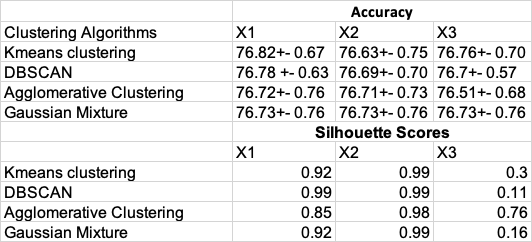

# Modeling and Evaluation 3

Visualize Results

**In these three graphs we compared the clustering occuring in  X1, X2 and X3 using K-Means.**

In [ ]:
# Source: https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

**For X1, we have 14 Clusters. For X2, we have 3 clusters and for X3 we have 17 clusters.** We chose these because they yielded the highest accuracy with the lowest standard deviation.

In [ ]:
n = 14
n2 = 3
n3 = 17

X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

cls = KMeans(n_clusters=n, init='k-means++',random_state=0)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

# append on the second clustering
cls2 = KMeans(n_clusters=n2, init='k-means++',random_state=0)
cls2.fit(X2)
newfeature2 = cls2.labels_ # the labels from kmeans clustering

# append on the third clustering
cls3 = KMeans(n_clusters=n3, init='k-means++',random_state=0)
cls3.fit(X3)
newfeature3 = cls3.labels_ # the labels from kmeans clustering


### Looking at X1 K-Mean Clusters:
For X1  we used 14 clusters  and compared `stays_in_week_nights` and `stays_in_weekend_nights` there is a bit of overlap but can see some seperation. K-Means may not be effective because it is including the outliers into a single cluster.

In [ ]:
plt.figure(figsize=(20,10))
X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X1=X1.values
plt.scatter(X1[:, 0], X1[:, 1]+np.random.random(X1[:, 0].shape)/2, c=newfeature, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('stays_in_weekend_nights'), plt.ylabel('stays_in_week_nights')
plt.grid()

### Looking at X2 K-Mean Clusters:
On X2 we are using 3 clusters and comparing `previous_bookings_not_canceled` and `is_repeated_guest`. There does seems to be better clustering. However, we could certainly choose more clusters because at high values of x and y, there is significant seperation between them.

In [ ]:
plt.figure(figsize=(10,10))
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]
X2=X2.values
plt.scatter(X2[:, 1], X2[:, 0]+np.random.random(X2[:, 0].shape)/2, c=newfeature2, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('previous_bookings_not_canceled'), plt.ylabel('is_repeated_guest')
plt.grid()

### Looking at X3 K-Mean Clusters:
Finally here using X3 we are using 17 clusters and comparing `adr` with `children` and `babies`.

#### Looking at Children and Babies vs Average Daily Rate for X3 
X3 seems to have clustered better than the X2 and X1. K-means was able to cluster number of children and babies together.

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]
X3=X3.values
plt.scatter(X3[:, 0], X3[:, 3]+np.random.random(X3[:, 0].shape)/2, c=newfeature3, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('adr'), plt.ylabel('children')

plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 4]+np.random.random(X3[:, 0].shape)/2, c=newfeature3, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('adr'), plt.ylabel('babies')
plt.grid()

#### KMeans Visuals

In [ ]:
# kmeans = KMeans(init='random', # initialization
#         n_clusters=14,  # number of clusters
#         random_state=0,
#         n_init=3)
# kmeans.fit(X1)
# # visualize the data
# centroids = kmeans.cluster_centers_
# plt.plot(X1[:, 1], X1[:, -1], 'r.', markersize=2) #plot the data
# # plt.scatter(centroids[:, 0], centroids[:, 1],
# #             marker='+', s=200, linewidths=3, color='k')  # plot the centroids
# plt.scatter(X1[:,0], X1[:,1], s=500)
# plt.show()

In [ ]:
# kmeans = KMeans(init='random', # initialization
#         n_clusters=1,  # number of clusters
#         random_state=1,
#         n_init=15,       # number of different times to run k-means
#         n_jobs=-1)
# kmeans.fit(X2)
# # visualize the data
# centroids = kmeans.cluster_centers_
# plt.plot(X2[:, 1], X2[:, -1], 'r.', markersize=2) #plot the data
# # plt.scatter(centroids[:, 0], centroids[:, 1],
# #             marker='+', s=200, linewidths=3, color='k')  # plot the centroids
# plt.scatter(X2[:,0], X2[:,1], s=500)
# plt.show()

In [ ]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(init='random', # initialization
#         n_clusters=2,  # number of clusters
#         random_state=1,
#         n_init=15,       # number of different times to run k-means
#         n_jobs=-1)
# kmeans.fit(X3)
# # visualize the data
# centroids = kmeans.cluster_centers_
# plt.plot(X3[:, 1], X3[:, -1], 'r.', markersize=2) #plot the data
# # plt.scatter(centroids[:, 0], centroids[:, 1],
# #             marker='+', s=200, linewidths=3, color='k')  # plot the centroids
# plt.scatter(X3[:,0], X3[:,1], s=500)
# plt.show()

### Plotting K-Distance for X1, X2 and X3

In these three graphs we can see the best value of epsilon.  According to documentation, epsilon is the distance threshold within which we've consider centers to have converged.

#### K-Distance - X1

In [ ]:
# Plotting K-distance Graph
distances = np.sort(X1, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### K-Distance - X2

In [ ]:
# Plotting K-distance Graph
distances = np.sort(X2, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### K-Distance - X3

In [ ]:
# Plotting K-distance Graph
distances = np.sort(X3, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### DBSCAN Cluster Plot for X1, X2 and X3

In [ ]:
plot_clusters(X1, cluster.DBSCAN, (), {'eps':0.025})

In [ ]:
plot_clusters(X2, cluster.DBSCAN, (), {'eps':0.025})

In [ ]:
#plot_clusters(X3, cluster.DBSCAN, (), {'eps':0.125})

### Agglomerative Clustering for X3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X3, method  = "ward"))
plt.title('Dendrogram')
plt.figure(figsize=(10, 10)) 
plt.show()

The dendrogram shows the different clusters on X3.  We see the bottoms up approach that that was used when clustering in this hierarchical method.

#### Agglomerative Clustering Plots 
Plotting on the clustering for X1, X2, and X3  these seem to  be similar to the ones from  K-Means. Which might help suspect that both  clustering  model will produce similar results for this dataset. 

In [ ]:
plot_clusters(X1, cluster.AgglomerativeClustering, (), {'n_clusters':4, 'linkage':'ward'})

In [ ]:
plot_clusters(X2, cluster.AgglomerativeClustering, (), {'n_clusters':4, 'linkage':'complete'})

In [ ]:
plot_clusters(X3, cluster.AgglomerativeClustering, (), {'n_clusters':4, 'linkage':'ward'})

#### Gaussian Models

In [ ]:
# Plot 
import matplotlib as mpl
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
plt.figure(figsize=(8,4))
splot = plt.subplot(1,1,1)
gmm = mixture.GaussianMixture(covariance_type='diag', n_components=17)
gmm.fit(X1)
Y_ = gmm.predict(X1)
for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_,
                                             color_iter)):
    if len(covar.shape)<2:
        tmp = np.zeros((2,2))
        np.fill_diagonal(tmp,covar)
        covar = tmp
    elif covar.shape[0] != covar.shape[1]:
        covar = np.diag(covar)
        
    v, w = linalg.eigh(covar)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X1[Y_ == i, 0], X1[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)


plt.title('Selected GMM')
plt.show()

In [ ]:
import matplotlib as mpl
color_iter = itertools.cycle(['k', 'r', 'b', 'g', 'c', 'm', 'y'])
plt.figure(figsize=(8,4))
splot = plt.subplot(1,1,1)
gmm = mixture.GaussianMixture(covariance_type='diag', n_components=16)
gmm.fit(X3)
Y_ = gmm.predict(X3)
for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_,
                                             color_iter)):
    if len(covar.shape)<2:
        tmp = np.zeros((2,2))
        np.fill_diagonal(tmp,covar)
        covar = tmp
    elif covar.shape[0] != covar.shape[1]:
        covar = np.diag(covar)
        
    v, w = linalg.eigh(covar)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X3[Y_ == i, 0], X3[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)


plt.title('Selected GMM')
plt.show()

# Modeling and Evaluation 4

Summarize the ramifications. 

### Cluster Algorithms: Advantages and Disadvantages

For our analysis, the average accuracy and standard deviation was used to determine the best model.

#### **K-Means**

Kmeans is used to simplify large datasets into simple datasets. It creates partitional clusters that are center based and well separated. Kmeans uses the distance between points.

Advantages:
- It is simple to use and can identify unknown group of data from large datasets.
- It adapts to changes easily.
- It produces higher clusters and its suitable for large datasets.
- The results from kmeans are easy to interpret.

Disadvantages:
- Kmeans clustering lacks consistency. It gives different results on different algorithm runs.
- It is sensitive to scale.
- The number of clusters (k) needs to be specified prior for the kmeans clustering to be effective. It can also be difficult to predict the k values.

#### **DBSCAN**

DBSCAN clustering is used to estimate the number of data points that are within clusters.

Advantages:
- DBSCAN works well with outliers and anomalies. It can be used to identify the noise.
- The number of clustering does not need to be specified.
- It is effective for working with arbitrary shapes.

Disadvantages:
- It does not work well with clusters having different densities.
- It is hard to determine the distance of epsilons due to the distance between data points.
- DBSCAN clustering relies on Eps-minPts parameters.

#### **Agglomerative clustering**

Agglomerative clustering merges pairs of clusters sample data. It uses linkage distance.

Advantages:

- It is easy to implement.
- It returns a hierarchy output which is informative. The dendrogram makes it easier to decide on the number of outputs.

Disadvantages:

- It is difficult to predict the k-value (number of clusters).
- It is sensitive to scale.

#### **Gaussian Mixture**

Gaussian mixture provides probabilities of each data point that belongs to the clusters. It is regarded as a model composed of K single Gaussian models. The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.

Advantages:

- It is more flexible compared to other models.
- It is the fastest algorithm for learning mixture models.

Disadvantages:

- Estimating the covariance can be difficult when there are insufficiently many points per mixture.
- It uses all the components it has access to which requires more data and information.

# Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?


# Exceptional Work

You have free reign to provide additional analyses or combine analyses.

Clustering using pairwise distances. Undersample to 1000 instances per class to get pairwise distances.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler(sampling_strategy={0:5000,1:5000})
X_pair, y_pair = us.fit_resample(X, y)

In [ ]:
#One hot encode specific columns without standardizing and scaling continuous variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["hotel", 'meal','market_segment','distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type']

ohe = OneHotEncoder(drop="first")

hotel_object = X_pair.select_dtypes('object')
ohe.fit(hotel_object)

codes = ohe.transform(hotel_object).toarray()
feature_names = ohe.get_feature_names(categorical_features)

X_pair = pd.concat([X_pair.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
continuous_variables = ['lead_time',"arrival_date_month",'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                        'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                        'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
                        'total_of_special_requests']
stdsclr = StandardScaler()

X_pair[continuous_variables] = stdsclr.fit_transform(X_pair[continuous_variables])

In [ ]:
EvaluateClassifierEstimator(clf, X_pair, y_pair, cv)

In [ ]:
y_pair.shape

Create pairwise distances for these variables

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

X_choose = X_pair[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]
d = pairwise_distances(X_choose, metric='euclidean')
cls = KMeans(n_clusters=11, init='k-means++',random_state=1)
cls.fit(d)
newfeature = cls.labels_
X_change = X_pair.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
X_new = np.column_stack((X_change,pd.get_dummies(newfeature)))
acc = cross_val_score(clf,X_new,y=y_pair,cv=cv)
print ("Average accuracy", acc.mean()*100, "+-", acc.std()*100)

In [ ]:
EvaluateClassifierEstimator(clf, X_new, y_pair, cv)